In [1]:
import NDEToolkit as ndt
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from pathlib import Path

### Class

### Pruebas

#### Data import

Shape: (120, 45, 505)


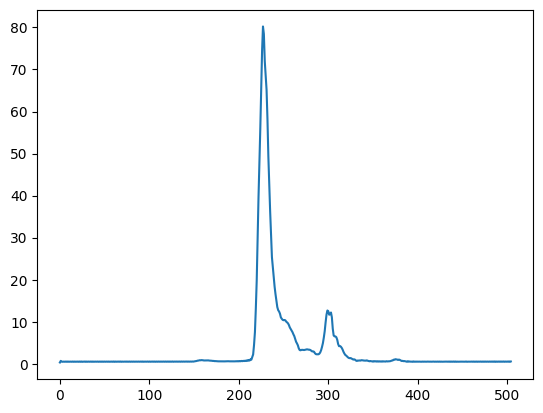

In [5]:
#Opening file
folders_UT = Path(r'\\192.168.10.106\imdea\DataDriven_UT_AlbertoVicente\03_UT_data\Probetas JI\probetas\4')

files_UT = '4_amplitude.tif'

filename = folders_UT / files_UT

data = tifffile.imread(filename)
data = np.swapaxes(data, 0, 1)
data = np.swapaxes(data, 1, 2)
print('Shape:',data.shape)

a = data.reshape((-1,data.shape[-1]))

a = a.mean(axis=0)

plt.plot(a)

### CScan

In [6]:
csm = ndt.CscanManager()

In [7]:
csm.define_gate1(200,280, lim = 50)
csm.define_gate2(280,300, lim = 2)
csm.define_gate3(300,400, lim = 5)

In [8]:
#Att puetas 1 y 2

att = np.apply_along_axis(csm.compute, 2, data)

In [9]:
#Att pueta 3

att3 = np.apply_along_axis(csm.compute_3, 2, data)

In [10]:
#Att pueta 2

att_airbus = np.apply_along_axis(csm.compute_DAC, 2, data)

In [11]:
# Guardalo con el tifffile
ndt.write_tiff(att,folders_UT / ('att2_' + files_UT + '.tif'))
ndt.write_tiff(att3,folders_UT / ("att3_"+ files_UT + ".tif"))
ndt.write_tiff(att_airbus,folders_UT / ("att_airbus_"+ files_UT + ".tif"))